In [97]:
import pandas as pd
import numpy as np

# make pairplots feature vs state
import seaborn as sns
import matplotlib.pyplot as plt



In [98]:
# import data from csv
df = pd.read_csv('data/kickstarter_projects.csv')

In [99]:
df

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed
...,...,...,...,...,...,...,...,...,...,...,...
374848,1486845240,Americas Got Talent - Serious MAK,Music,Hip-Hop,United States,2018-01-02 14:13:09,2018-01-16,500,0,0,Live
374849,974738310,EVO Planner: The World's First Personalized Fl...,Design,Product Design,United States,2018-01-02 14:15:38,2018-02-09,15000,269,8,Live
374850,2106246194,"Help save La Gattara, Arizona's first Cat Cafe!",Food,Food,United States,2018-01-02 14:17:46,2018-01-16,10000,165,3,Live
374851,1830173355,Digital Dagger Coin,Art,Art,United States,2018-01-02 14:38:17,2018-02-01,650,7,1,Live


In [100]:
df.nunique()

ID             374853
Name           372061
Category           15
Subcategory       159
Country            22
Launched       374297
Deadline         3164
Goal            27692
Pledged         39989
Backers          3963
State               5
dtype: int64

In [101]:
# are there any duplicates?
df['Name'].duplicated().sum()

2792

In [102]:
#write all duplicates to new dataframe
df_duplicates = df[df['Name'].duplicated(keep=False)]
df_duplicates

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
524,1896639590,Test (Canceled),Art,Performance Art,United States,2009-09-14 19:37:43,2009-10-14,50,0,0,Canceled
865,2135481078,Canceled (Canceled),Technology,Software,United States,2009-10-25 21:30:47,2009-12-16,2000,0,0,Canceled
982,23113347,Here You Go,Publishing,Publishing,United States,2009-11-10 20:34:29,2009-12-08,2500,3085,96,Successful
1127,488433765,FOUR,Film & Video,Narrative Film,United States,2009-12-01 19:40:40,2010-02-02,18000,19325,181,Successful
1165,210353159,Deleted (Canceled),Photography,Photography,United States,2009-12-07 00:39:05,2010-03-07,5000,0,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...
374625,192967537,Short Film,Film & Video,Film & Video,United States,2017-12-29 19:07:22,2018-01-28,5000,0,0,Live
374669,2080425836,PerfectCombination: Help Us Turn The Dating Wo...,Technology,Web,United Kingdom,2017-12-30 17:41:08,2018-01-29,13640,0,0,Live
374672,1442880158,Solstice,Publishing,Fiction,United Kingdom,2017-12-30 19:33:00,2018-01-29,4092,79,2,Live
374755,1812821305,100 Little Loaves,Art,Sculpture,United States,2018-01-01 07:24:18,2018-01-31,1000,745,6,Live


In [103]:
df.describe()

,ID,Goal,Pledged,Backers
count,3.748530e+05,3.748530e+05,3.748530e+05,374853.000000
mean,1.074656e+09,4.586378e+04,9.121073e+03,106.690359
std,6.191377e+08,1.158778e+06,9.132054e+04,911.718520
min,5.971000e+03,0.000000e+00,0.000000e+00,0.000000
25%,5.380728e+08,2.000000e+03,3.100000e+01,2.000000
50%,1.075300e+09,5.500000e+03,6.250000e+02,12.000000
75%,1.610149e+09,1.600000e+04,4.051000e+03,57.000000
max,2.147476e+09,1.663614e+08,2.033899e+07,219382.000000


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374853 entries, 0 to 374852
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ID           374853 non-null  int64 
 1   Name         374853 non-null  object
 2   Category     374853 non-null  object
 3   Subcategory  374853 non-null  object
 4   Country      374853 non-null  object
 5   Launched     374853 non-null  object
 6   Deadline     374853 non-null  object
 7   Goal         374853 non-null  int64 
 8   Pledged      374853 non-null  int64 
 9   Backers      374853 non-null  int64 
 10  State        374853 non-null  object
dtypes: int64(4), object(7)
memory usage: 31.5+ MB


In [105]:
df

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed
...,...,...,...,...,...,...,...,...,...,...,...
374848,1486845240,Americas Got Talent - Serious MAK,Music,Hip-Hop,United States,2018-01-02 14:13:09,2018-01-16,500,0,0,Live
374849,974738310,EVO Planner: The World's First Personalized Fl...,Design,Product Design,United States,2018-01-02 14:15:38,2018-02-09,15000,269,8,Live
374850,2106246194,"Help save La Gattara, Arizona's first Cat Cafe!",Food,Food,United States,2018-01-02 14:17:46,2018-01-16,10000,165,3,Live
374851,1830173355,Digital Dagger Coin,Art,Art,United States,2018-01-02 14:38:17,2018-02-01,650,7,1,Live


In [106]:
# i want to take a sample of 10% of the data
df_pre =df.sample(frac=0.1, random_state=1)

In [107]:
df_pre = df_pre.drop(columns= ['ID', 'Pledged', 'Backers'])


In [108]:

df_pre = df_pre.query('State != "Live" and State != "Suspended"')
df_pre

,Name,Category,Subcategory,Country,Launched,Deadline,Goal,State
263367,Desteria - A New Dawn,Games,Video Games,United Kingdom,2015-12-08 14:19:31,2016-02-06,3626,Failed
265424,Two Gun Crowley,Film & Video,Festivals,United States,2015-12-24 22:44:42,2016-01-06,1000000,Failed
366662,FoxTrot subscription box,Crafts,Crafts,United States,2017-10-26 23:30:41,2017-12-05,756,Successful
138087,Wanted Board Game (Canceled),Games,Tabletop Games,Canada,2014-04-15 19:18:17,2014-05-15,27581,Canceled
142558,Glitter Coated Dog.,Film & Video,Experimental,United Kingdom,2014-05-15 09:37:08,2014-06-14,1704,Failed
...,...,...,...,...,...,...,...,...
73979,"Delicious Habanero Chocolates, made by Cioccol...",Food,Food,United States,2012-11-02 02:10:46,2012-12-02,3000,Failed
93386,Tessa and Hannah's Gilded Summer Collection,Fashion,Fashion,United States,2013-04-27 05:52:51,2013-05-11,600,Successful
179870,Miserable New York Mets Fan T-Shirt,Fashion,Apparel,United States,2014-10-27 18:57:41,2014-12-16,1500,Failed
74965,The Sun is on Fire,Film & Video,Shorts,United States,2012-11-12 21:50:19,2012-11-27,1500,Successful


array([[<Axes: title={'center': 'Goal'}>]], dtype=object)

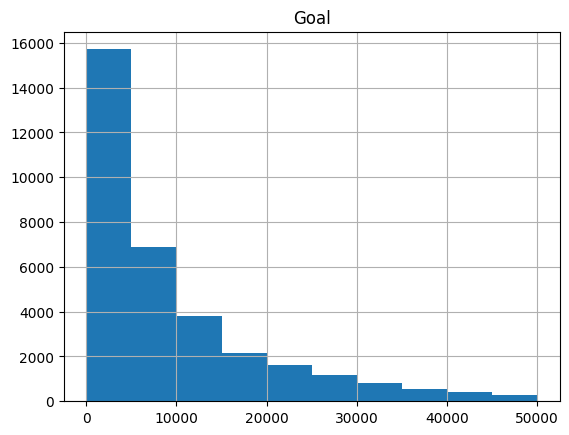

In [109]:
# make a histogram of the goal column and filter Goal < 10000
df_pre = df_pre[df_pre['Goal'] < 2000000]
df_pre[df_pre['Goal'] < 50000].hist()

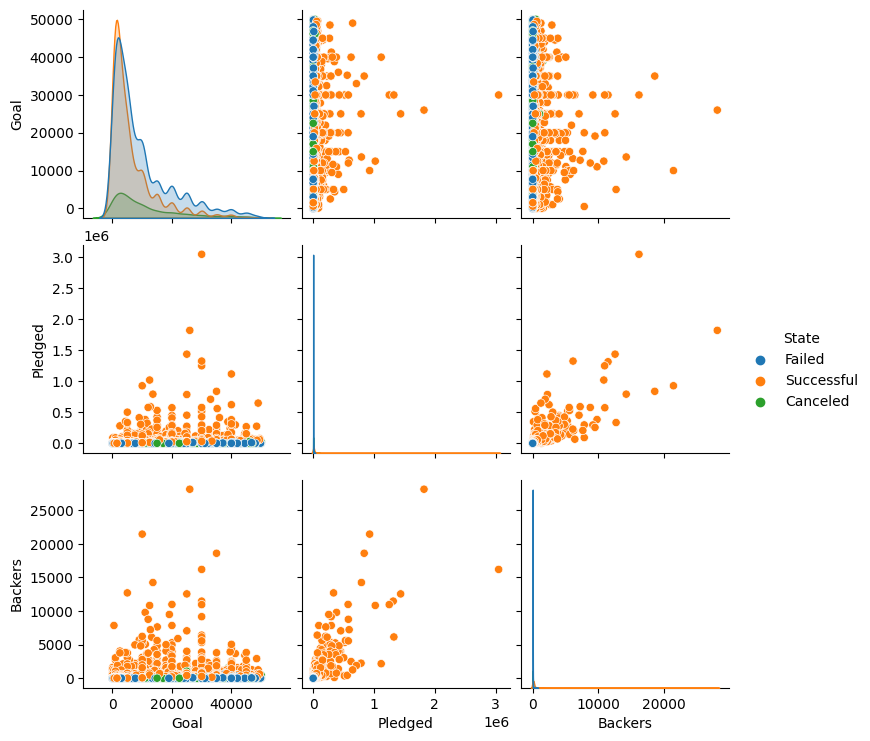

In [70]:
# make pairplots feature vs state
sns.pairplot(df_pre, hue='State', diag_kind='kde')
plt.show()

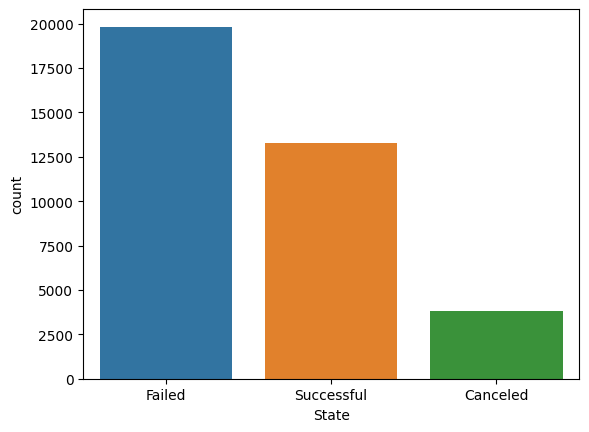

In [110]:
# bar plot of the number of projects by state
sns.countplot(x='State', data=df_pre)
plt.show()